In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784',as_frame=False)

In [3]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [4]:
X,y = mnist.data,mnist.target #.data is input and .target is the labels

In [5]:
import matplotlib.pyplot as plt 

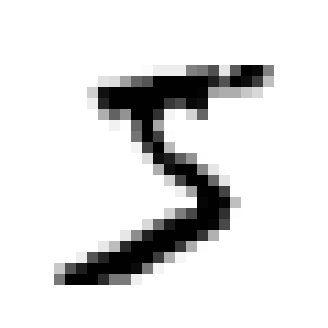

In [6]:
def plot_digit(image_data):
    image = image_data.reshape(28,28) #this is numpy. remember that the input and outputs are numpy arrays
    plt.imshow(image,cmap="binary") 
    plt.axis("off")

plt.figure(figsize=(6,4))
some_digit = X[0]
plot_digit(some_digit)
plt.show()


they are manually shuffling since apparently the data is already shuffled

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:] , y[:60000] , y[60000:]

Start small. Let's focus on teaching '5'. So now it is a **Binary Classifier** that only needs to worry about two things: is 5 , and is not 5

In [8]:
y_train_5 = (y_train=='5')
y_test_5 = (y_test=='5')

# Binary Classifier - Stochastic Gradient Descent (SGD)

In [9]:
from sklearn.linear_model import SGDClassifier

In [10]:
sgd_clf = SGDClassifier(random_state=42)

Just training it to identify 5. And we will test on just that first one from before

In [11]:
sgd_clf.fit(X_train,y_train_5)
sgd_clf.predict([some_digit])

array([ True])

Book says that for classification, evaluation is trickier.

- **cross_val_score**

In [12]:
from sklearn.model_selection import cross_val_score

In [ ]:
# cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy") 
#it's like grid but only the cross val and accuracy score evaluation

array([0.95035, 0.96035, 0.9604 ])

I just caught that. It did three switcheroo combinations and gave three accuracy scores. 2nd was the best

And remember, this accuracy score is nothing but the proportion of True Positives + True negatives, which is meaningful

In [14]:
from sklearn.dummy import DummyClassifier

In [15]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

False


DummyClassifier doesn't really learn or get trained. It's pre trained on a fixed technique. But SGD uses Gradient Descent to actually learn.

so no fives were detected

What I learned: cross_val_score(model,X,y,cv,scoring) , classifiers can interpret images as numpy arrays. 

In [16]:
#sometimes you can predict with cross validation right away
from sklearn.model_selection import cross_val_predict

This will take like 20s so let's comment out

In [ ]:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

### Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(y_train_5,y_train_pred)

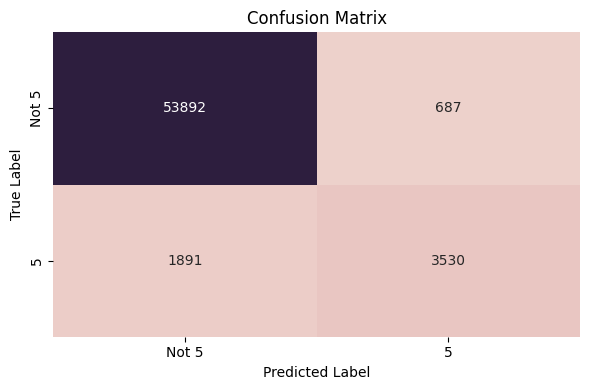

In [ ]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap=sns.cubehelix_palette(as_cmap=True),cbar=False,xticklabels=['Not 5', '5'], yticklabels=['Not 5', '5'])
#annot=True gives the frequencies respectivelu in the boxes 
# x and y tick labels are for the side labels yk
#cmap is the color map and that specific one I found on the documentation
# I turned color bar off . That would be useful in a correlation matrix though


plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

Conventionally, x is predicted and y is actual 

The confusion matrix above is measuring accuracy, so it's like relatively close random cluster of points around the target. How many good did you get out of all your shots?

But sometimes, accuracy won't be what you are looking for. You might be looking for **precision** (TP / (TP+FP)) . There is also recall or sensitivity (TP / (TP+FN)) , or True positive rate

We can call them both, but we can combine them into the **F1-Score**. It is directly proportional to precision and TPR both. 

In [27]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7325171197343847

**Here is the catch though:** Precision and Recall are inversely proportional. That is the Precision/Recall tradeoff. 

Here is what is going on. There is **precision** (of all the predictions, how many were correct?) and **recall** (of all real trues, how many did we correctly predict?), and then there is a **Threshold**

The threshold is default 0, but it's how much are we gonna let slide when we decide the categories. higher is more cautious, so higher precision and less recall. Vice versa for lower threshold. 

In [31]:
from sklearn.metrics import precision_recall_curve

How do we decide the threshold? We first need to get the decision scores. Then we plot the curve

ValueError: x and y must have same first dimension, but have shapes (60000,) and (1,)

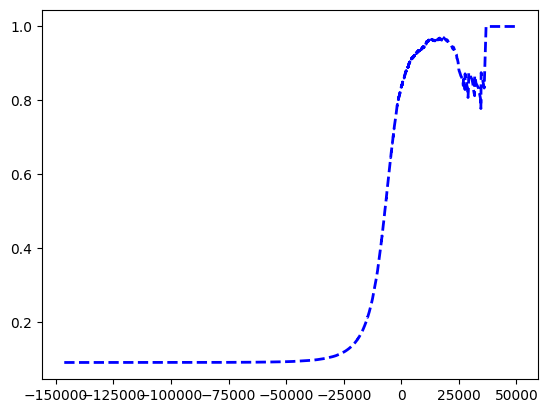

In [33]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function") 
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

threshold = 3000

plt.plot(thresholds,precisions[:-1],"b--",label="Precision",linewidth=2)
plt.plot(thresholds,recalls[:1],"g-",label="Recall",linewidth=2)
plt.vlines(threshold,0,1.0,"k","dotted",label="threshold")
plt.grid(True)
plt.title("Prec/Recall Curve to find threshold")
plt.xlabel("Threshold")
plt.legend()
plt.show()